# Data Analysis

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Metadata Handover](#Metadata-Handover)
- [Summary](#Summary)

## Sample Records Analysis

In this section, the data file is loaded and some sample data records are shown.

In [1]:
import os
import json

records = []
path_data = './data'
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [2]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [3]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [4]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [5]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '245c': ['André S...
corporate                                                    {}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [6]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes1833-1897(DE-588)11851...
corporate                                                    {}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [7]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph196...
corporate                                                    {}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon1571-1638(DE-588...
corporate                                                    {}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person                                {'100': [], '245c': ['']}
corporate               {'110': ['St. Gallischer Hilfsverein']}
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person                                {'100': [], '245c': ['']}
corporate                                                    {}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [12]:
! head -n 2 ./data/job7r4A1.json

{"docid":"554061449","035liste":["(OCoLC)1085491204","(IDSBB)006899773"],"isbn":[],"ttlfull":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"ttlpart":{"245":["Die Feist von Kienberg","eine Wasenmeisterfamilie im Ancien Régime zwischen Ehrbarkeit und Delinquenz"]},"person":{"100":["SchluchterAndré"],"245c":["André Schluchter"]},"corporate":{},"pubyear":"1992    ","decade":"1992","century":"1992","exactDate":"1992    ","edition":"","part":[],"pages":["S. 102-114"],"volumes":["S. 102-114"],"pubinit":[],"pubword":[],"scale":"","coordinate":[],"doi":[],"ismn":[],"musicid":"","format":["BK020000"]}
{"docid":"554061481","035liste":["(OCoLC)1085491341","(IDSBB)006899983"],"isbn":[],"ttlfull":{"245":["Reimereien"]},"ttlpart":{"245":["Reimereien"]},"person":{"100":["NaegeliWerner"],"245c":["von Werner Naegeli"]},"corporate":{},"pubyear":"1986    ","decade":"1986","century":"1986","exactDate":"1986    ","edition":"","part":[],"pag

A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [13]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [14]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [15]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [16]:
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [17]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [18]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [19]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [20]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [21]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


122513                [(OCoLC)1100982879, (NEBIS)011367122]
14295     [(SNL)991004022289703976, (IDSBB)006922382, (S...
113502    [(ETHRESEARCH)oai:www.research-collection.ethz...
33270     [(VAUD)991021213253102852, (CKB)41100000000103...
172907                 [(IDSBB)000550001, (NEBIS)000498526]
118980       [(SERSOL)ssib013431205, (WaSeSS)ssib013431205]
61537     [(IDSBB)007058131, (NEBIS)011350086, (RERO)R00...
174856    [(NEBIS)011357983, (IDSBB)007107023, (IDSSG)00...
172130                [(OCoLC)1089457771, (NEBIS)011346227]
123998    [(OCoLC)1050140553, (IDSBB)007068958, (OCoLC)1...
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [22]:
columns_metadata_dict['strings_columns'] = ['century']

In [23]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [24]:
df['century'].sample(n=15)

101593    2019
158069    2017
83114     2018
90043     2002
32478     2018
54755     2018
72153     1970
105740    2018
157333    1960
54709     2019
150432    1961
161059    uuuu
182964    2019
27162     2017
47475     1971
Name: century, dtype: object

In [25]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [26]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [27]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [28]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

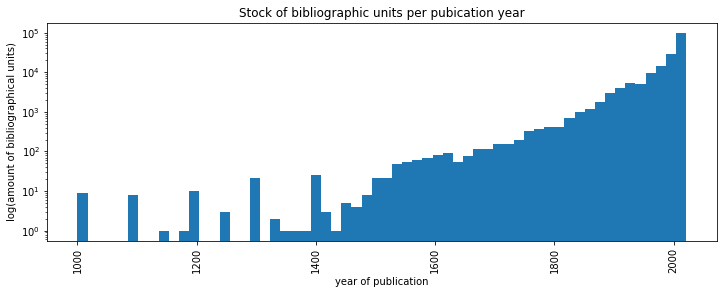

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In Swissbib's deduplication implementation, the attribute has a different meaning, though, holding the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$ an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account, see below.

In [30]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [31]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [32]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [33]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [34]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

48811                                           []
59584                         [E0082331, N0470318]
13892                         [E0120000, N0510700]
137875    [E0074200, E0074200, N0463427, N0463400]
54315                         [E0130500, N0524000]
59416                         [E0065600, N0491500]
104560                        [E0064311, N0470430]
110593                        [W1153000, N0420000]
24065                                           []
116023                        [E0021500, N0485400]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [35]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

57054              [E0203500, E0201900, N0383100, N0383100]
137329             [E0082310, E0082314, N0464707, N0464711]
143472             [E0064728, E0064725, N0461460, N0461455]
148518             [E0100200, E0100206, N0464600, N0464645]
102577    [E 009 05 00, E009.083333, N 047 15 00, N047.2...
144673             [E0071030, E0071454, N0472004, N0471948]
133537             [E0070205, E0070202, N0463814, N0463809]
25264              [E0064742, E0064739, N0455536, N0455532]
137877             [E0102620, E0102615, N0463834, N0463830]
137875             [E0074200, E0074200, N0463427, N0463400]
Name: coordinate, dtype: object

In [36]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [37]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed with the help of a function $\texttt{.split}\_\texttt{coordinate()}$, [[WiCo2001](./A_References.ipynb#wico2001)].

In [38]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [39]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

114814    e0061244
17859     e0095853
132936    e0055230
18196     e0083134
11084     e0072600
114784    e0064001
36018     e0054524
31863     e0085027
110572    e0095900
110007    w0063400
114808    e0063314
126751    e0061940
25072     e0224400
76809     e0185900
114743    e0094619
113766    e0091209
15763     e0081115
25428     e0064633
133225    e0085041
143523    e0122000
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [40]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

90485     n0470043
1846      n0460829
134743    n0472616
126794    n0463731
137877    n0463834
182727    n0465034
20724     n0470523
28404     n0544500
146153    n0471001
35089     n0471143
136968    n0452600
54200     n0472507
13521     n0470022
126748    n0464037
35897     n0421000
106140    n0474829
94304     n0550000
114739    n0470537
5102      n0471300
59291     n0502800
Name: coordinate_N, dtype: object

In [41]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attriubte $\texttt{coordinate}$ is dropped.

In [42]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [43]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For a first analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list()}$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [44]:
df.corporate.sample(n=20)

60505     {'710': ['Katholischer Kirchenbauverein (St. G...
164595    {'710': ['Comité national olympique et sportif...
131863                                                   {}
149290    {'110': ['Olympic Winter Games. Organizing Com...
108036                                                   {}
36366                                                    {}
172012                                                   {}
114093                                                   {}
120212                                                   {}
100164                                                   {}
4990                                                     {}
1437                                                     {}
36075                                                    {}
19002                                                    {}
128497                                                   {}
74237                                                    {}
96700                                   

In [45]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%
Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%
Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [46]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [47]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [48]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,"verein deutscher bibliothekare, regionalverban...","verein deutscher bibliothekare, zentral- und l..."
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,"heilsarmee, nationales hauptquartier bern","salvation army, nationales hauptquartier"
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [49]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

167068    international association of athletics federat...
149042                      fabrik lochmannscher musikwerke
165082               comité international pour le fair play
125745                                            die ärzte
154244    korea advanced institute of science and techno...
51346           scotland, sovereign (1685-1688 : james vii)
158321    winter youth olympic games. organizing committ...
153965    summer olympic games. organizing committee. 12...
170014                    comité de candidature d'innsbruck
150680    olympic winter games. organizing committee. 19...
163520             salt lake convention and visitors bureau
152885                             club atlético sudamerica
165520    united states olympic committee. division of c...
154840                     qatar national olympic committee
158850    summer olympic games. organizing committee. 24...
161876    olympic winter games. organizing committee . 2...
94699                              kanto

In [50]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

179639                                     canal 9 (sierre)
22243                        bikablo® akademie gmbh & co.kg
14044                                              level 42
175972             north american society for sport history
75258     american society of mechanical engineers, amer...
128961    institut international de la communication vis...
154923    australian society for sports history. nationa...
170099    fédération internationale de football association
123250                                    ensemble resonanz
112489                                      photomask japan
127261             forschungsgruppe "staatsprojekt europa."
24241     great britain, great britain, central statisti...
132176                      österreichische notariatskammer
11998                                           moonraisers
163851    international olympic committee. olympic solid...
164626    summer olympic games. organizing committee. 30...
178684    chambre d'économie publique du

In [51]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

47145     biochemical society (great britain)., symposium.
15102              schweiz, bundesamt für landestopografie
106150                             hallwag kümmerly + frey
110572                             hallwag kümmerly + frey
61510                              hallwag kümmerly + frey
122278               deutschland, verteidigungsministerium
110574                                           hema maps
94678                                            hécatombe
104811                                 usa, war department
94673                                            hécatombe
138344             schweiz, bundesamt für landestopografie
110582                             hallwag kümmerly + frey
45080                          wirtschaftsuniversität wien
113869                             peter-ochs-gesellschaft
110569                             hallwag kümmerly + frey
110598                             hallwag kümmerly + frey
72562                                        werbung kis

In [52]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080              {'810': ['Wirtschaftsuniversität Wien']}
47145     {'110': ['Biochemical Society (Great Britain)'...
52134     {'710': ['Kunsthandlung Helmut H. Rumbler'], '...
94673     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94674     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94678     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94679     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
94680     {'710': ['Ensemble Batida', 'Hécatombe'], '810...
113869                 {'810': ['Peter-Ochs-Gesellschaft']}
113870                 {'810': ['Peter-Ochs-Gesellschaft']}
133706    {'110': ['Carnegie Endowment for International...
133739    {'810': ['Deutschland', 'Verteidigungsminister...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation therefore is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed as one singe attribute in the feature matrix generation. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys()}$, the result of which is shown below for some sample cases.

In [53]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [54]:
len(df['corporate_full'].loc[0])

0

In [55]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

164021               ente nazionale italiano per il turismo
168895    olympic winter games. organizing committee . 2...
166582    association suisse des typographes. groupe de ...
149544    summer olympic games. organizing committee. 30...
167190    olympic winter games. organizing committee . 2...
90298                                 verein langer samstag
150813    summer olympic games. organizing committee. 15...
169114    olympic winter games. organizing committee. 18...
32456     schweizerischer verein der freundinnen junger ...
114858               eidgenössisches topographisches bureau
165539    general association of international sports fe...
153441    summer olympic games. organizing committee. 30...
160931    summer olympic games. organizing committee. 21...
11302                                         living colour
170918    international olympic committee congrès olympi...
158490            ski club of great britain alpine ski club
110217                                  

145482                                  al- maʿhad al-ʿilmī
128326                          ateliers d'ethnomusicologie
47269                                 royal academy of arts
55165                     musée des arts décoratifs (paris)
56239     helvetia, schweizerische feuerversicherungs-ge...
60775          groupe de recherches historiques de cartigny
132897                               université de lausanne
105923                                   rilke-gesellschaft
157772                            polski komitet olimpijski
17268     schweizerischer verband frauenhilfe, sektion s...
174389    société des arts de genève, classe des beaux-arts
59810                          museum europäischer kulturen
57576                                      bonhams (london)
19730     verband deutsch-schweizerischer frauenvereine ...
47832     verein zur förderung der gebärdensprache bei k...
90274                                 atelier otto rietmann
14440                               berl

In [56]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [57]:
columns_metadata_dict['strings_columns'].append('decade')

In [58]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see above and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [59]:
columns_metadata_dict['strings_columns'].append('docid')

In [60]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [61]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [62]:
columns_metadata_dict['list_columns'].append('doi')

In [63]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 10114, with missing doi 173293 => 5.5%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [64]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1854                                     [00028947575214]
1899    [10.5451/unibas-007052902, urn:nbn:ch:bel-bau-...
1937    [10.5451/unibas-007052953, urn:nbn:ch:bel-bau-...
2046                                     [04600317120499]
2063                                     [00602567484134]
2207                                     [00039841539226]
2245                                     [00096802280399]
2286                                     [00761195120422]
2494                                     [04250095800740]
2779                                     [00888837038720]
2996                     [urn:nbn:de:101:1-2016111912809]
3087                                     [00605633131628]
3385                     [urn:nbn:de:101:1-2017040728657]
4094                                     [00602547324375]
4504                                     [00656605612812]
4710                             [10.14361/9783839445334]
6579                                     [00887254706021]
7624          

In [65]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

97067                                [10.5169/seals-790612]
96666                                [10.5169/seals-790043]
56284                              [10.5281/zenodo.1283188]
74566                                [10.3931/e-rara-74623]
97363                                [10.5169/seals-790645]
58632                               [10.4337/9781784716752]
46820                           [10.1007/978-3-319-76424-5]
92479                              [urn:nbn:ch:bel-1290279]
96723                                [10.5169/seals-790167]
58414     [10.5167/uzh-165127, 10.1080/17538947.2018.144...
39459                           [10.1007/978-981-13-1123-9]
90544                            [10.3929/ethz-b-000324636]
148130                          [10.1007/978-3-319-77219-6]
30427        [10.5167/uzh-162708, 10.2903/j.efsa.2018.5347]
96372                                [10.5169/seals-790010]
128527        [10.5167/uzh-160268, 10.1007/JHEP06(2018)084]
97399                                [10

In [66]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbduleditor.edthtt...
corporate                                                        {}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [67]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

10,114 records hold 1 list element(s).
2,312 records hold 2 list element(s).
13 records hold 3 list element(s).
11 records hold 4 list element(s).
1 records hold 5 list element(s).
=> Maximum number of list elements 5


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element()}$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [68]:
df = dpf.reduce_to_doi_element(df)

In [69]:
df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

113473      10.1103/PhysRevD.99.014509
172639              10.5167/uzh-168389
20789         10.3929/ethz-b-000309556
49203        10.1007/s40719-018-0147-x
76721     10.1371/journal.pone.0193640
45989        10.1007/978-3-319-75115-3
94830               10.1039/c8cp05880f
77157             10.5169/seals-789707
74546             10.3931/e-rara-74619
125671            10.3931/e-rara-11298
46337            10.1515/9783110208535
141359                10.1787/19990618
74153        10.1007/s12022-018-9558-z
96564             10.5169/seals-790365
122378            10.3931/e-rara-76174
122205       10.1024/1661-8157/a003075
87702        10.1186/s12909-018-1442-5
148081              10.5167/uzh-168019
94845               10.5167/uzh-162417
181272       10.1007/978-94-007-6881-9
Name: doi, dtype: object

In [70]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [71]:
columns_metadata_dict['strings_columns'].append('edition')

In [72]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [73]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

52932              1re édition
1710              2.verb.Aufl.
137221           First edition
94691      3ª edizione rivista
17011               1. Auflage
148400           4. bis 9. Tsd
114024              4. Auflage
179549           First edition
55573      [Paperback edition]
83798          1. Auflage 2019
3754                  1. Aufl.
57888              14. Auflage
19763         Première édition
66168                 [5e éd.]
81401     3ème édition révisée
77376             1ère édition
59804          Primera edición
65122                    Repr.
114819            Revisée 1906
54178             55a edizione
Name: edition, dtype: object

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ has been implemented for attribute $\texttt{edition}$.

In [74]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

52932        1
1710         2
137221        
94691        3
17011        1
148400       4
114024       4
179549        
55573         
83798        1
3754         1
57888       14
19763         
66168        5
81401        3
77376        1
59804         
65122         
114819    1906
54178       55
Name: edition, dtype: object

In [75]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filles rows is still reduced.

In [76]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [77]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [78]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [79]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [80]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [81]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'u', '-', ' '}


In [82]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


In [83]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%
Non-digit characters are {'u'}


In [84]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristianjoint aut...
corporate                                                        {}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographical units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographical units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [85]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [86]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used fo all other values of the attribute.

In [87]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [88]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

177775    bk020000
63615     bk020053
65700     bk020000
70097     bk020000
149894    bk020000
110549    bk020000
1235      bk020000
39210     bk020053
91904     bk020053
133061    cr030600
Name: format, dtype: object

In [89]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [90]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

157169    
155349    
161455    
152421    
151152    
168125    
155976    
153550    
161264    
164668    
Name: format, dtype: object

In [91]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [92]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [93]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
94048,bk020000,bk,020000
29348,bk020000,bk,020000
88511,bk020053,bk,020053
115049,bk020000,bk,020000
71836,bk020000,bk,020000
140912,bk020000,bk,020000
103216,bk020800,bk,020800
32947,bk020053,bk,020053
117038,bk020053,bk,020053
99691,bk020053,bk,020053


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [94]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [95]:
columns_metadata_dict['list_columns'].append('isbn')

In [96]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [97]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

78593     [978-3-319-77472-5]
169617        [0-87322-075-7]
87520     [978-1-5106-2115-2]
24244             [1179-2000]
134290    [978-1-78536-986-5]
181747    [978-3-319-98243-4]
138953        [87-421-0036-4]
59827     [978-607-7562-15-3]
52142     [978-3-319-89698-4]
182666    [978-3-319-95237-6]
37703     [978-0-231-54338-5]
115998    [978-2-266-25445-8]
75625             [2352-619X]
65943         [2-07-036672-3]
8236      [978-3-8458-2135-1]
56677     [978-0-691-15051-2]
113945    [978-88-329-6014-3]
124172    [978-3-922909-80-4]
132850    [978-3-7705-6164-3]
99642     [978-3-7373-7073-8]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [98]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

131388    [978-1-84457-434-6 (pbk.), 1-84457-434-2 (pbk....
81733                    [81-7702-005-6, 978-81-7702-005-2]
132843                   [978-3-16-156880-0, 3-16-156880-X]
40668     [978-3-11-010960-3, 3-11-010960-3 (Trade Cloth...
81358                    [81-7702-005-6, 978-81-7702-005-2]
124867                   [978-94-92881-27-4, 94-92881-27-6]
79399                    [978-3-7639-6015-6, 3-7639-6015-5]
146684               [978-1-138-47793-3, 978-1-351-10381-7]
40464        [978-0-674-42894-2 (print), 978-0-674-42895-9]
105416                   [978-1-5417-7385-1, 1-5417-7385-3]
87813                        [0-85303-488-5, 0-85303-489-3]
45381                    [978-3-8260-6188-2, 3-8260-6188-8]
89584                    [978-3-11-125255-1, 3-11-125255-8]
86307                    [978-963-324-598-9, 963-324-598-2]
25317                    [978-3-8448-0635-9, 3-8448-0635-0]
33638     [1-68325-600-X, 1-68325-601-8, 1-78525-069-8, ...
117421       [978-90-8964-781-8, 978-90-

In [99]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).
3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).
519 records hold 5 list element(s).
398 records hold 6 list element(s).
173 records hold 7 list element(s).
156 records hold 8 list element(s).
84 records hold 9 list element(s).
76 records hold 10 list element(s).
51 records hold 11 list element(s).
43 records hold 12 list element(s).
29 records hold 13 list element(s).
26 records hold 14 list element(s).
19 records hold 15 list element(s).
18 records hold 16 list element(s).
10 records hold 17 list element(s).
9 records hold 18 list element(s).
8 records hold 19 list element(s).
7 records hold 20 list element(s).
7 records hold 21 list element(s).
7 records hold 22 list element(s).
7 records hold 23 list element(s).
7 records hold 24 list element(s).
5 records hold 25 list element(s).
4 records hold 26 list element(s).
3 records hold 27 list element(s).
3 records hold 28 list elemen

In [100]:
max(df.isbn.apply(lambda x : len(x)))

42

In [101]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

39158     [978-3-11-044748-4, 3-11-044748-7, 978-3-11-04...
171752    [978-1-138-22865-8, 1-138-22865-6, 978-1-138-2...
148140    [978-1-4742-3212-8, 1-4742-3212-4, 978-1-4742-...
58959     [978-5-4224-1204-4, 5-4224-1204-4, 978-5-4224-...
126999    [978-1-315-60322-3, 1-315-60322-5, 0-7546-7843...
28221     [978-3-7910-2601-5, 978-3-7910-2602-2, 978-3-7...
28023     [3-209-00798-5, 3-209-00858-2, 3-209-02692-0, ...
11393     [3-551-74191-3, 3-551-74192-1, 3-551-74193-X, ...
30782     [978-0-19-438433-9, 0-19-438433-0, 978-0-19-43...
16986     [978-3-7643-5515-9, 3-7643-5515-8, 978-3-7643-...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [102]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [103]:
columns_metadata_dict['list_columns'].append('ismn')

In [104]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 10114, with missing ismn 173293 => 5.5%


Attribute $\texttt{ismn}$ holds the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [105]:
df[df.doi != df.ismn]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992uuuu,...,[],,bk020000,,,,,,,bk,020000
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986uuuu,...,[],,bk020000,,,,,,,bk,020000
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923uuuu,...,[],,bk020000,,,,,,,bk,020000
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947uuuu,...,[],,bk020000,,,,,,,bk,020000
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991uuuu,...,[],,bk020000,,,,,,,bk,020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},{'100': ['ShawGeorge H.Verfasserautauthttp://i...,{},2018,2018,2018,2018uuuu,...,[],,bk020053,,,,,,,bk,020053
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgenHerausgebere...",{},2019,2019,2019,2019uuuu,...,[],,bk020053,,,,,,,bk,020053
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...",{'100': ['AmreinWilhelm1872-1946(DE-588)116302...,{},1930,1930,1930,1930uuuu,...,[],,bk010000,,,,,,,bk,010000
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '245c': ['Idee & Ill. M...",{},2000,2000,2000,2000uuuu,...,[],,bk020000,,,,,,,bk,020000


In [106]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

10,114 records hold 1 list element(s).
2,312 records hold 2 list element(s).
13 records hold 3 list element(s).
11 records hold 4 list element(s).
1 records hold 5 list element(s).
=> Maximum number of list elements 5


In [107]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

24866    [oai:serval.unil.ch:BIB_48517DE762D2, urn:nbn:...
34755    [10.5451/unibas-006838498, urn:nbn:ch:bel-bau-...
34758    [10.5451/unibas-006836804, urn:nbn:ch:bel-bau-...
34814    [10.5451/unibas-006837535, urn:nbn:ch:bel-bau-...
34833    [10.5451/unibas-006844191, urn:nbn:ch:bel-bau-...
Name: ismn, dtype: object

Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [108]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

24216                                          m205420079
24226                                          m205418410
123477    10.3929/ethz-b-000327849, 10.3390/polym11020376
Name: ismn, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element()}$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [109]:
df = dpf.reduce_to_ismn_element(df)
df.ismn[df.ismn.apply(lambda x : len(x))>0]

19713     9790046306525
22734     9790230985758
24216        M205420079
24226        M205418410
24227     9790010402901
121796    9790230989862
Name: ismn, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [110]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [111]:
columns_metadata_dict['strings_columns'].append('musicid')

In [112]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [113]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [114]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [115]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

4432                   7243 5 56369 2 8
130391             Playa Sound PS 65163
14380                       FNAC 592086
21388                         DVfM 6406
14862               LC 0011674321922372
8885              Epic/Jive 88691948092
105903          Bestellnummer: 70880745
7784                         3145234862
14832           Domino WIGCD307 LC10192
93560                   Chanterelle 430
139250                       27969 H.L.
15086     EMI Classics 7243 5 56120 2 1
74052                       88875061412
54690                        XL 171 792
50156                       Tudor 76538
25828                           5932529
8375                            WCD 024
116659          Bestellnummer: 86245720
14318                  Apache 242 096-2
144028          Bestellnummer: Spirit07
Name: musicid, dtype: object

In [116]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

4432                  7243
130391               65163
14380               592086
21388                 6406
14862     0011674321922372
8885           88691948092
105903            70880745
7784            3145234862
14832                  307
93560                  430
139250               27969
15086                 7243
74052          88875061412
54690                  171
50156                76538
25828              5932529
8375                   024
116659            86245720
14318                  242
144028                  07
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps as is.

In [117]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [118]:
columns_metadata_dict['list_columns'].append('pages')

In [119]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [120]:
columns_metadata_dict['list_columns'] = ['part']

In [121]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [185]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

47813                        number 1220
126132                                 1
135441                         band 9, 9
114312               bd. 1, seite 53-161
96553                    -/50(1995-1996)
97436                          1/2(2001)
60028                                 20
61310                              bd. 3
48345                                163
17208                             teil 1
25876                45(2018), 3489-3498
47185                         band 10270
73246                               9, 9
66267                                 34
92883                   81(12):1973-1981
131977                          603, 603
85587                                 16
61977                   1998, s. 254-256
147213                              1907
81134     jg. 31 (2001), nr. 4, s. 26-30
Name: part, dtype: object

In [123]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [124]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [125]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [126]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [127]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [128]:
df.person.sample(n=20)

18998     {'100': ['FrommErich1900-1980(DE-588)118536389...
95178     {'100': ['KammacherAlphonsecre'], '245c': ['Al...
155806    {'100': ['SeiterWalter H.'], '245c': ['[Red. W...
126874    {'100': [], '700': ['SmithL.(DE-588)1077106092...
89302     {'100': ['RubinsteinSaul A.author'], '700': ['...
179533    {'100': ['PitteloudAntoine(RERO)A009638145'], ...
23935     {'100': ['GildemeisterJohann1812-1890(DE-588)1...
114744    {'100': ['AbrahamsPeter H.1947-(DE-588)1090240...
88662     {'100': [], '700': ['HalpernJennifer J.editor'...
42004     {'100': ['RumbleDouglas'], '245c': ['Douglas R...
146537    {'100': ['VeringJuttaVerfasseraut'], '245c': [...
80241     {'100': ['CassidyCathy(RERO)A020005916aut'], '...
23505     {'100': ['ForsythFrederick(RERO)A003254207cre'...
150322    {'100': ['GiersbergGünter'], '245c': ['[Red. G...
63824                             {'100': [], '245c': ['']}
86284     {'100': ['NasitiTiti SurtiVerfasseraut'], '700...
50992     {'100': ['MedicusDieter(RERO)A

In [129]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%
Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%
Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%
Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [130]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

168107                     international boxing association
87247                                          martin riker
152719    beijing organizing committee for the games of ...
59299                                            sonia alba
151415    ed. by harold abrahams and jack crump ; with a...
130470                                     sotheby's milano
156978                     ed. by: erich müller... [et al.]
169971           michelle hanna ; foreword by rhoda roberts
50163                           amelie funcke, eva havenith
151741    cristóbal gabarrón ; textos orlando franco, co...
66122                                  von walter böckemann
97244                                         [wim bekkers]
152663                      michael leeds, peter von allmen
129849                                         bruno zeller
45646     sandra pisot ; mit einem beitrag von lena bühl...
85645                  toni riethmaier mit felicia englmann
11292     regie: sergei bodrov ; drehbuc

In [131]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

115115    sponahelma1968-(verfasser)(de-588)115134956htt...
90598                    khannaeem ullah(rero)a027795171cre
143025                                                weeks
77601                       mouawadwajdi(rero)a005763981cre
15885                       høigiltjacob(rero)a027761317cre
165345                                           keimmarion
179517             baldwinjames1924-1987(rero)a002963229aut
57813     steinbeckwolfram1945-(de-588)12119616xverfasse...
65142               wahriggerhard1923-1978(de-588)104535164
160587                                            holubjiří
71758                                           zoruttpieri
56852       huhnsiegfried1955-(de-588)113624085verfasseraut
129431            tâchepierre-alain1940-(rero)a003917170cre
22790             duffieldmark(de-588)170864936verfasseraut
103318                        goodmanmartin(rero)a003308378
105780                          brunnermichelleverfasseraut
26007                                   

In [132]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

46759     hossainzahideditor, zhangjiupengeditor, chenca...
86987                  herrmann-nytkoingrid(rero)a016677009
27576     paṭelagautama vā1936-(de-588)1030326142herausg...
75458     bhandarkarramkrishna gopal1837-1925(de-588)117...
10646     verdigiuseppe1813-1901rigoletto(de-588)3001662...
181583    boehnkelukasherausgeberedtedthttp://id, thranm...
68294              salomonpierre1902-1983(de-588)112274837x
105836                            mackayj. rossverfasseraut
125288    greendavid gordon1975-(de-588)140341927filmreg...
76622     bravo-oviedoandrésherausgeberedt, pretzschhans...
177456    hinderermarcel1969-(de-588)1052420893verfasseraut
146793                                         brocasalexis
16777     scheelen-nováčekkristina(de-588)1167732421verf...
182428    bertranm. teresajoint author, mouilleronstépha...
34975     illiesflorian1971-(de-588)121846067verfasser v...
179213                         costemaurice(rero)a013140933
94052     wanishabir hussain(de-588)1162

In [133]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

179983                                              nobdad2
98323     amiotkarine-marierose et titouan sur l'île du ...
84674             dugomier<<les >>enfants de la résistance5
105219                              yann1954-angel wings1-3
21816           speltensolivier1971-<<l'>>armée de l'ombre2
98037     sempéjean-jacques<<le >>petit nicolasgallimard...
47286                         rutishauserwalter1940-2017fdp
130349                           ristjohannsämtliche werke9
77458               brisou-pellenevelyne1947-<<le >>manoir3
19712                            legendremarc1956-amphoria2
19792                            legendremarc1956-amphoria1
111318                     guettierbénédictetrotro et zaza5
79743                          guardiniromano1885-1968werke
149048                        rutishauserwalter1940-2017fdp
60109           pietrkiewiczjerzy1916-2007opuscula selecta3
144498                    amiotkarine-marieprune & séraphin
76009                      scottwaltersi

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [134]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.1972-(de-588)141498587verfasseraut,,jemisinn.k.1972-the broken earth1
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix, though.

In [135]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [136]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [137]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [138]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [139]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [140]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

136213                         [Naar, Day & Naar, printers]
164032                                             [NYOGOC]
146086                [Washington: The Library of Congress]
25931                                    [Grey Walls Press]
152163                                        [Ed. Conseil]
114197                                   [Actes Sud Junior]
160228                                             [SYOGOC]
167686                    [International Olympic Committee]
150356                            [Les Ed. Hors-Collection]
121532    [Peter Lang GmbH, Internationaler Verlag der W...
152500                   [Los Angeles Organizing Committee]
163286                                       [H. N. Abrams]
156595                                            [[BOCOG]]
120239                           [publisher not identified]
170015                                      [Meyer & meyer]
160963                        [Comité olympique hellénique]
82571                                   

Two kinds of entries stand out as special in the sample data.

In [141]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [142]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will be handled as regular publisher's description, too.

In [143]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [144]:
columns_metadata_dict['list_columns'] = ['pubword']

In [145]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [146]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [147]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [148]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '245c': ['André S...",{},1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '245c': ['von Werne...",{},1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...",{},1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '245c': ['']}",{},1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '245c': ['Urs Oberlin ...",{},1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},{'100': ['ShawGeorge H.Verfasserautauthttp://i...,{},2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.verfasserautauthttp://id,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgenHerausgebere...",{},2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgenherausgeberedtedthttp://id, kühne...",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...",{'100': ['AmreinWilhelm1872-1946(DE-588)116302...,{},1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm1872-1946(de-588)116302429verfass...,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '245c': ['Idee & Ill. M...",{},2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [149]:
columns_metadata_dict['strings_columns'].append('scale')

In [150]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [151]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [152]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


The attribute will be taken over to further processing as is [[WiCo2001](./A_References.ipynb#wico2001)].

In [153]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [154]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [155]:
df.ttlfull.sample(n=20)

19167     {'245': ['Il Senato costituzionale della Repub...
156406    {'245': ['Revue olympique', 'organe officiel d...
175301    {'245': ['Polymeric surfaces for sports and re...
24452     {'245': ['Neue Perspektiven auf den schweizeri...
99717                     {'245': ['Droghe e conseguenze']}
164043    {'245': ['Jeux de la XXIIe olympiade', '[rappo...
41753     {'245': ['Newton the alchemist', 'science, eni...
26186     {'245': ['Je progresse en français', 'Grammair...
60350     {'245': ['Come scrivere in cinese', '175 carat...
30549                                 {'245': ['L'espace']}
138383    {'245': ['Notes from the Seminar, Urban Highwa...
11952                      {'245': ['Sticky & sweet tour']}
44315     {'245': ['Walking with villagers', 'How Liberi...
53048     {'245': ['Three preludes founded on Welsh hymn...
20786     {'245': ['Vom Platz der Siege ins Künstlerhaus']}
122110    {'245': ['Pour comprendre les maths, CP, cycle...
54040     {'245': ['La société fluide', 

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [156]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%
Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [157]:
df.ttlfull_245.sample(20)

133830    hashtag islam, how cyber-islamic environments ...
176636                     basket, la formation des joueurs
148753    ancien service vétérinaire cantonal, 37, rue d...
151312                              skiing history magazine
114353                  on an age-old anvil, wince and sing
155873    odd man out, an autobiography : true stories o...
55864     émeutes urbaines et protestations, une singula...
172571             zervixkarzinom - diagnostik und therapie
85619     die jahre 1912 bis 1917 mit zunftmeister leonh...
107002    treatise on the military law of the united sta...
131301    english in the law courts, the part that artic...
139010                        paris, die kubistischen jahre
127889    greta novak, misstrauen ist ihr beruf : treatment
10049                                      pour les enfants
99250                  open innovation, corporate incubator
98022                       andin se fait un nouveau copain
164208    spezialkatalog, ganzsachen zu 

In [158]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

107396          legislative history of the buy american act
61463     sammler und mäzen in münchen, murnau und weltw...
91027     reisverslagen van noord-nederlanders uit de ze...
29300                                tausendundeins gemälde
132537    a treatise on the conflict of laws, or, privat...
8037                                        marc and robert
141366                    science fiction film & television
32000                                          kunstschätze
130990        ehe in ägypten zur ptolemäisch-römischen zeit
35216                                    orgnization theory
144306                    yale journal of international law
1550                               grubers blumensträuschen
16559                                        breaking cover
108659    law of boundaries and fences in relation to th...
177603    častotnyj slovarʹ "žitija" protopopa avvakuma,...
129652                                 crime and correction
148746                                 r

In [159]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that enter the data can be stored in this field, too.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data of the feature matrix.

In [160]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [161]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [162]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [163]:
df.ttlpart.sample(n=20)

83929     {'245': ['International yearbook of industrial...
19058     {'245': ['Senior entrepreneurship', 'a selecti...
71118     {'245': ['The grammatical tradition and the ri...
139450                              {'245': ['Platonismo']}
80840     {'245': ['Binz auf Rügen', 'ein Ostseebad zehn...
104900    {'245': ['A novel anti-HER2 anthracycline-base...
167362    {'245': ['Recueil TAS 1993', 'CAS compilation ...
19012     {'245': ['[Stockalperhaus und -palast in Brig]']}
182649    {'245': ['Mathematische Kurzweil oder 333 Aufg...
37289     {'245': ['Aufgaben zur höheren Mathematik', 'f...
136163    {'245': ['Law of Inheritance in All Forty-Eigh...
96223                        {'245': ['Gefährliches Quiz']}
100085    {'245': ['Sickert - paintings', 'Royal Academy...
18365       {'245': ['Onlinedurchsuchungen in Österreich']}
40379          {'245': ['Instruments and the imagination']}
89224     {'245': ['Journalism after Snowden', 'the futu...
1544      {'245': ['Französische Sprachl

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [164]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [165]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [166]:
columns_metadata_dict['list_columns'].append('volumes')

In [167]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated, though [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [168]:
df['volumes'].sample(n=15)

76662                        [448 Seiten]
68632                                  []
46327     [1 online resource (276 pages)]
91702                [1 Online-Ressource]
119225                [1 online resource]
171603                           [155 S.]
4241                             [153 S.]
110244                       [295 Seiten]
101672                 [1 CD + 1 Booklet]
158009             [1 fasc. (non paginé)]
112982                                 []
127378               [1 Online-Ressource]
48235                            [158 S.]
178714                                 []
14671                           [144 Bl.]
Name: volumes, dtype: object

In [169]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [186]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

74951     1
60557     1
29802     1
90295     1
60944     1
82442     1
30148     1
86087     1
60824     6
30177     1
92527     4
17268     1
124141    x
114091    1
60528     1
Name: volumes, dtype: object

In [171]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

11208                [1 Compact Disc, 1 Digital Video Disc]
109506    [2 Bänden (verschiedene Seitenzählungen), Illu...
60555                   [1 Partitur (7 Seiten), 32 Stimmen]
72533                   [1 Partitur (4 Seiten), 27 Stimmen]
60689                   [1 Partitur (7 Seiten), 68 Stimmen]
32902              [1 online resource., 1 online resource.]
24997     [1 DVD-Video (circa 91 Min.), 1 Blu-ray-Disc (...
72563                  [1 Partitur (13 Seiten), 65 Stimmen]
60556                  [1 Partitur (13 Seiten), 33 Stimmen]
63320     [1 Online-Ressource ([3], 2 leaves, 3-4 p., 5-...
94710                            [92 Seiten, 42 Tierkarten]
5437                                            [24 S., 4']
33278              [1 online resource., 1 online resource.]
94674          [1 flexi disque, 1 volume (sans pagination)]
72520     [58 verschieden gezählte Blätter, 1 DVD-ROM ; ...
Name: volumes, dtype: object

In [172]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [173]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [174]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

The sophisticated algorithm to identify and extract either pages of volumes information will not be reimplemented for this capstone project but the data extract offered [[SwRe](./A_References.ipynb#swre)] will be used. Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [175]:
df = dpf.transform_list_to_string(df, 'volumes')

In [183]:
df['volumes'].sample(n=25)

105642                                            254 pages
175703                                               565 s.
66719                                                2 vol.
31737                                                      
44744                                     1 online resource
116150                                           306 seiten
119345                                    1 online resource
51435                                           [8], 120 p.
157120                         [11] p. dans un portefeuille
4736                                                 256 s.
114646                        1 partition de choeur (16 p.)
102067                                           316 seiten
90619     1 dvd-vidéo (ca. 113 min.), une prod.: pmn edi...
131111                                               112 s.
130033                                                94 s.
127914                      1 online-ressource (1 h 20 min)
136539                                  

In [177]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['s. 102-114' '43 s.' '75 p.' ... '232 s., 2 bl. taf.'
 '26 seiten, 7 ungezählte blätter bildtafeln' 'xli, 282 seiten']

Total number of unique values 36,466


The attribute will be further processed in this way in the upcoming chapters.

In [178]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [179]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [180]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identifyed that are considered to be relevant for comparison. The list of these attributes is shown below.

In [181]:
columns_metadata_dict

{'data_analysis_columns': ['coordinate_E',
  'coordinate_N',
  'corporate_full',
  'doi',
  'edition',
  'exactDate',
  'format_prefix',
  'format_postfix',
  'isbn',
  'ismn',
  'musicid',
  'part',
  'person_100',
  'person_700',
  'person_245c',
  'pubinit',
  'scale',
  'ttlfull_245',
  'ttlfull_246',
  'volumes']}

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).